## Coffee Popularity Visualization

Analyzes the most popular type of coffee in the **morning**, **afternoon**, and **evening** for each month over the year, based on **index_1.csv**


In [1]:
import pandas as pd

df = pd.read_csv('index_1.csv')
df.head()

,date,datetime,cash_type,card,money,coffee_name
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte


In [6]:
# Convert time column to datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Define periods
def categorize_period(t):
    hour = t.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    else:
        return 'Evening'

df['period'] = df['datetime'].apply(categorize_period)
df['month'] = df['datetime'].dt.month
df.head()

,date,datetime,cash_type,card,money,coffee_name,period,month
0,2024-03-01,2024-03-01 10:15:50.520,card,ANON-0000-0000-0001,38.7,Latte,Morning,3
1,2024-03-01,2024-03-01 12:19:22.539,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,3
2,2024-03-01,2024-03-01 12:20:18.089,card,ANON-0000-0000-0002,38.7,Hot Chocolate,Afternoon,3
3,2024-03-01,2024-03-01 13:46:33.006,card,ANON-0000-0000-0003,28.9,Americano,Afternoon,3
4,2024-03-01,2024-03-01 13:48:14.626,card,ANON-0000-0000-0004,38.7,Latte,Afternoon,3


In [ ]:
import matplotlib.pyplot as plt

# Compute most popular coffee by month & period
result = df.groupby(['month', 'period', 'coffee_name']).size().reset_index(name='count')
top_coffee = result.sort_values(['month','period','count'], ascending=[True,True,False])\
        .groupby(['month','period']).first().reset_index()

top_coffee

,month,period,coffee_name,count
0,1,Afternoon,Latte,16
1,1,Evening,Latte,16
2,1,Morning,Americano with Milk,27
3,2,Afternoon,Americano,55
4,2,Evening,Cocoa,32
5,2,Morning,Americano,44
6,3,Afternoon,Americano,63
7,3,Evening,Latte,26
8,3,Morning,Americano,55
9,4,Afternoon,Cappuccino,18


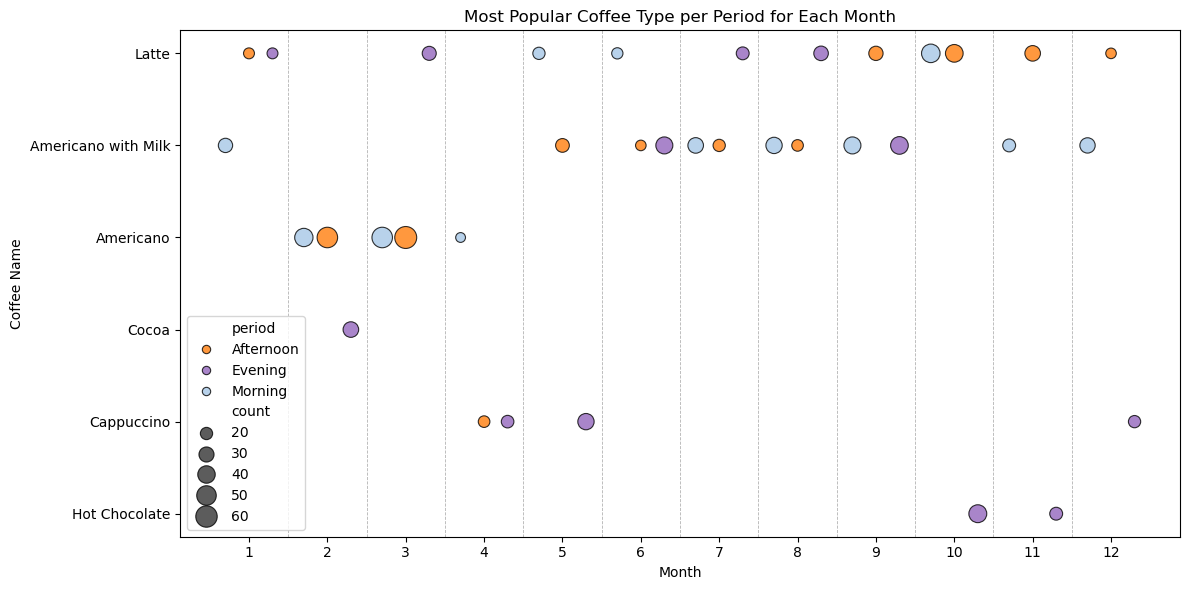

In [38]:
import seaborn as sns

df_plot = top_coffee.copy()

custom_colors = {
    "Morning": "#a7c7e7",    # blue
    "Afternoon": "#ff7f0e",  # orange
    "Evening": "#9467bd"     # purple
}

#    Create a small horizontal offset for each period
#    This prevents points from overlapping at the same month
period_offset = {
    "Morning": -0.3,
    "Afternoon": 0.0,
    "Evening": 0.3
}

df_plot["month_shifted"] = df_plot["month"] + df_plot["period"].map(period_offset)

# Scatter plot with shifted x-axis
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=df_plot,
    x="month_shifted",      # use shifted month value
    y="coffee_name",
    hue="period",
    size="count",
    sizes=(50, 250),
    alpha=0.8,
    edgecolor="black",      # add edgecolor so overlapping is clearer
    linewidth=0.8,
    palette=custom_colors
)
for m in range(df_plot["month"].min(), df_plot["month"].max()):
    plt.axvline(
        x=m + 0.5,          # midpoint between month m and m+1
        color="gray",
        linestyle="--",
        linewidth=0.6,
        alpha=0.6
    )


# Make x-ticks show integer months (1–12), not shifted values
plt.xticks(
    ticks=range(1, 13),
    labels=range(1, 13)
)

plt.title("Most Popular Coffee Type per Period for Each Month")
plt.xlabel("Month")
plt.ylabel("Coffee Name")
plt.tight_layout()
plt.show()